<a href="https://colab.research.google.com/github/Eddahost/My-Portfolio/blob/main/Copy_of_Email_spam_clasifier_model_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
#Load the CSV file
df = pd.read_csv('/content/spam.csv', encoding='latin-1')  # sometimes spam datasets use latin-1 encoding

# View the first 5 rows (default)
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

In [5]:
df

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report

**Class Balance**

label
ham     4825
spam     747
Name: count, dtype: int64


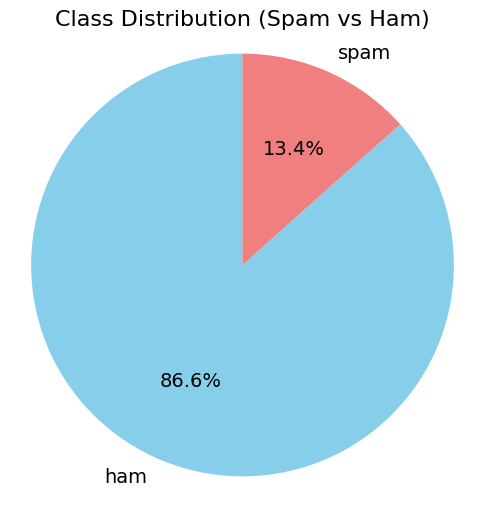

In [7]:
import matplotlib.pyplot as plt

# Count classes
class_counts = df['label'].value_counts()
print(class_counts)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    textprops={'fontsize': 14}
)
plt.title('Class Distribution (Spam vs Ham)', fontsize=16)
plt.axis('equal')  # Circle shape
plt.show()

**Summary Statistics**

In [8]:
# Create 'msg_char_length' column based on length of text messages
df['msg_char_length'] = df['text'].apply(len)

# Now compute summary stats grouped by class
summary_stats = df.groupby('label')['msg_char_length'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

print(summary_stats)


       count        mean  median        std  min  max
label                                                
ham     4825   71.023627    52.0  58.016023    2  910
spam     747  138.866131   149.0  29.183082   13  224


In [9]:
df

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,msg_char_length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,161
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,37
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125


**Missing Value Analysis**

In [10]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 label                 0
text                  0
Unnamed: 2         5522
Unnamed: 3         5560
Unnamed: 4         5566
msg_char_length       0
dtype: int64


In [11]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [12]:
df

,label,text,msg_char_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


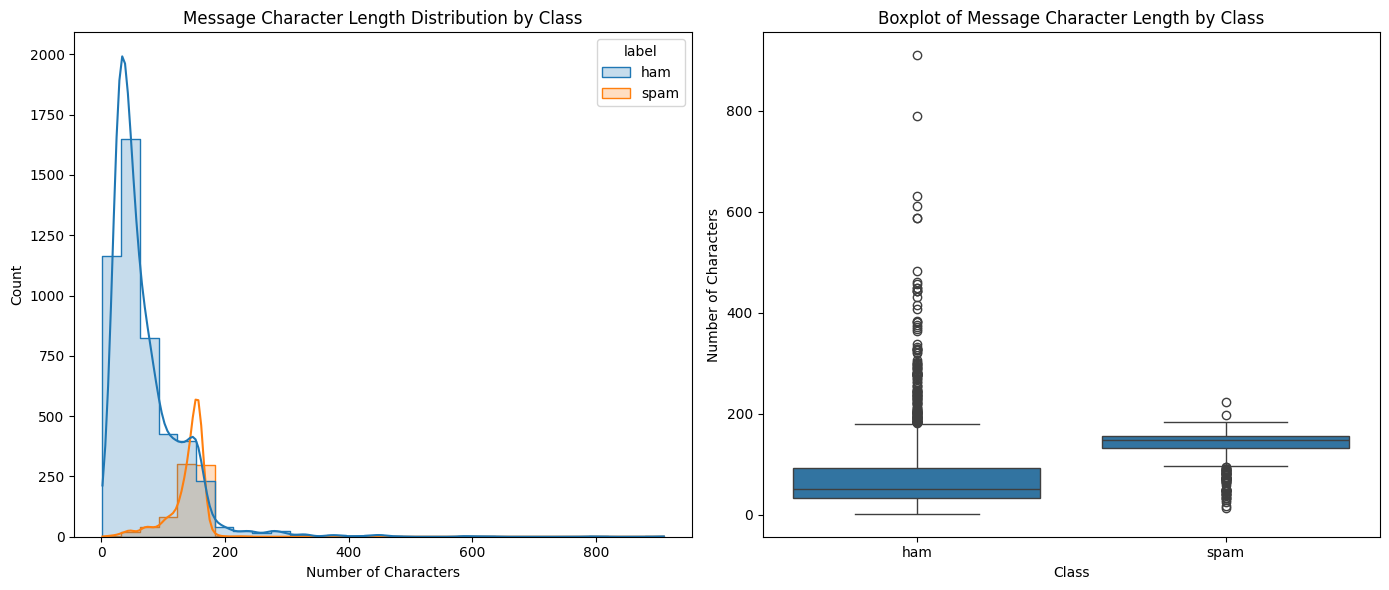

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram for message character length
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='msg_char_length', hue='label', bins=30, kde=True, element='step')
plt.title('Message Character Length Distribution by Class')
plt.xlabel('Number of Characters')
plt.ylabel('Count')

# Boxplot for message character length
plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='msg_char_length', data=df)
plt.title('Boxplot of Message Character Length by Class')
plt.xlabel('Class')
plt.ylabel('Number of Characters')

plt.tight_layout()
plt.show()

**Word Clouds**

In [14]:
# Splitting Spam Messages
df_spam = df[df['label'] == 'spam'].copy()

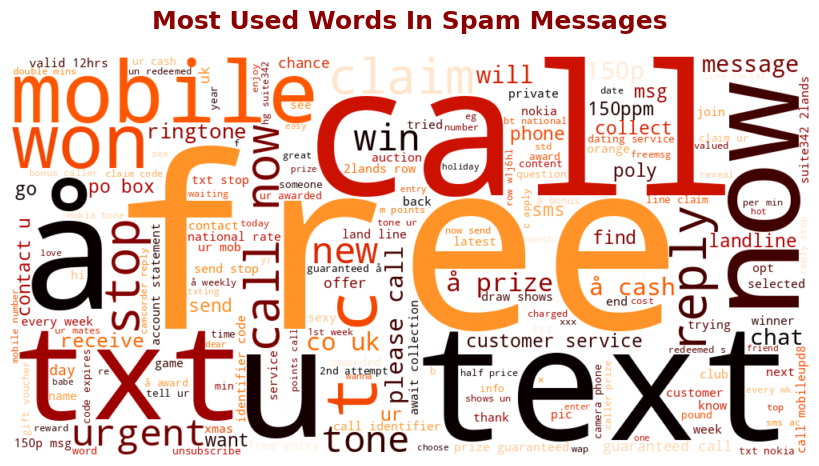

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter spam messages
df_spam = df[df['label'] == 'spam']

# Prepare the text for the WordCloud
comment_words = ''
stopwords = set(STOPWORDS)

for val in df_spam['text']:
    val = str(val).lower()
    tokens = val.split()
    comment_words += " ".join(tokens) + " "

# Generate WordCloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stopwords,
    min_font_size=10,
    max_words=1000,
    colormap='gist_heat_r'
).generate(comment_words)

# Plot WordCloud
plt.figure(figsize=(8, 6))
plt.title('Most Used Words In Spam Messages', fontsize=18, pad=20, weight='bold', color='darkred')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

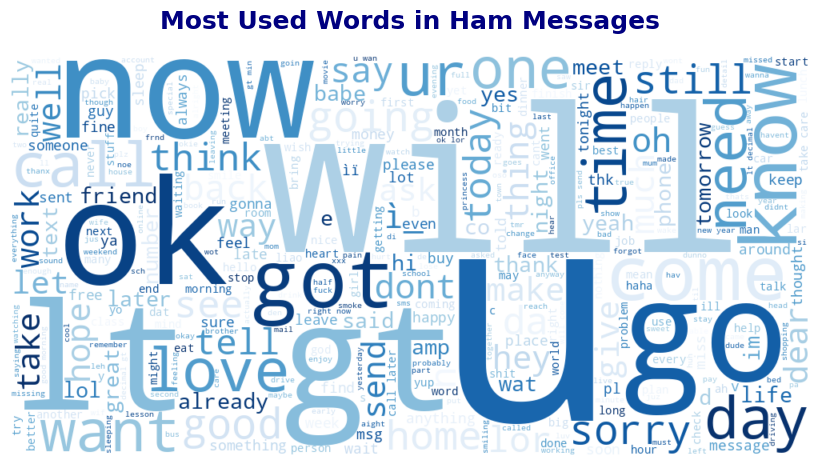

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter ham messages
df_ham = df[df['label'] == 'ham']

# Prepare text from ham messages
comment_words = ''
stopwords = set(STOPWORDS)

for val in df_ham['text']:
    val = str(val).lower()
    tokens = val.split()
    comment_words += " ".join(tokens) + " "

# Create WordCloud for ham messages
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stopwords,
    min_font_size=10,
    max_words=1000,
    colormap='Blues'
).generate(comment_words)

# Plotting the WordCloud
plt.figure(figsize=(8, 6))
plt.title('Most Used Words in Ham Messages', fontsize=18, pad=20, weight='bold', color='navy')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


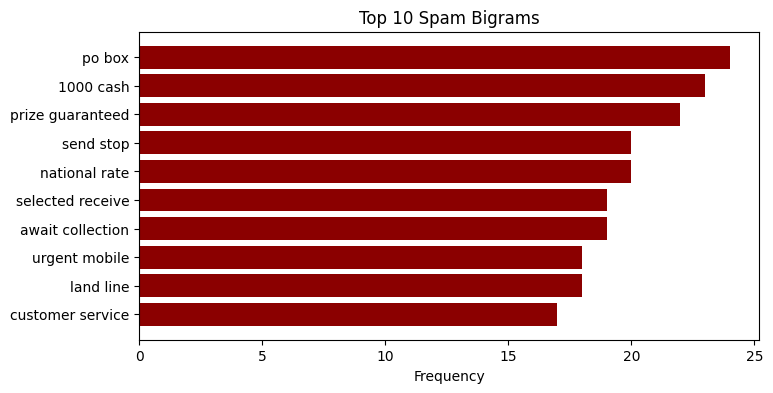

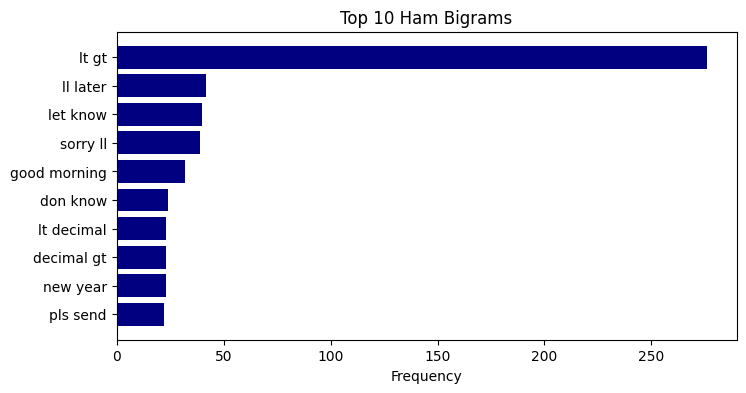

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

def get_top_bigrams(corpus, n=None):
    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)

    bigrams_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    bigrams_freq = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)

    return bigrams_freq[:n]

def plot_bigrams(bigrams, title, color):
    df_bigrams = pd.DataFrame(bigrams, columns=['bigram', 'count'])

    plt.figure(figsize=(8,4))
    plt.barh(df_bigrams['bigram'], df_bigrams['count'], color=color)
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Split spam and ham
spam_corpus = df[df['label'] == 'spam']['text']
ham_corpus = df[df['label'] == 'ham']['text']

# Get top 10 bigrams
top_spam_bigrams = get_top_bigrams(spam_corpus, n=10)
top_ham_bigrams  = get_top_bigrams(ham_corpus, n=10)

# Plot bigrams
plot_bigrams(top_spam_bigrams, 'Top 10 Spam Bigrams', 'darkred')
plot_bigrams(top_ham_bigrams, 'Top 10 Ham Bigrams', 'navy')

In [18]:
import string

# Word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Digit count
df['digit_count'] = df['text'].apply(lambda x: sum(c.isdigit() for c in str(x)))

# Uppercase word count
df['upper_count'] = df['text'].apply(lambda x: sum(1 for w in str(x).split() if w.isupper()))

# Special character count (punctuation)
special_chars = set(string.punctuation)
df['special_char_count'] = df['text'].apply(lambda x: sum(1 for c in str(x) if c in special_chars))

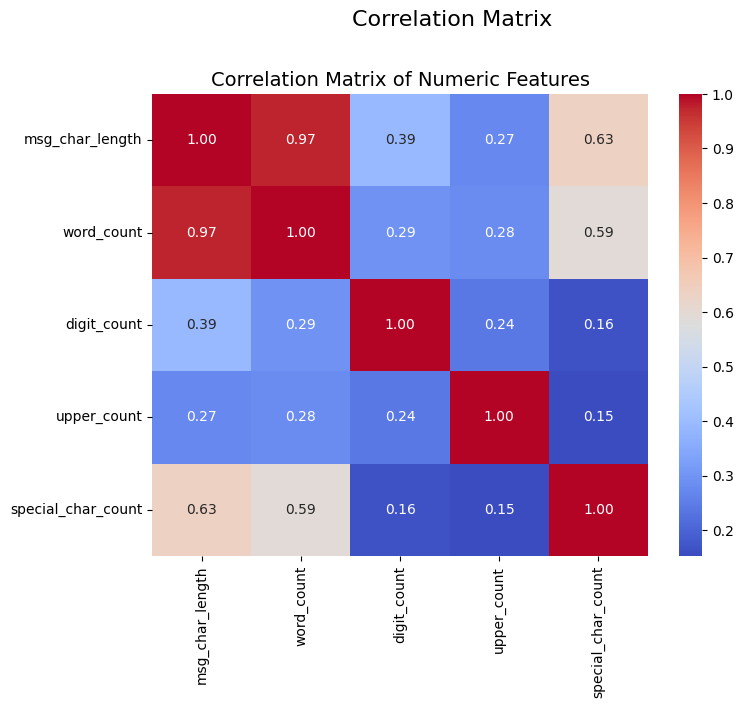

In [19]:
numeric_features = ['msg_char_length', 'word_count', 'digit_count', 'upper_count', 'special_char_count']
corr_matrix = df[numeric_features].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.suptitle('Correlation Matrix', fontsize=16, y=1.02)
plt.show()


**Train-test splitting**

In [20]:
# Map labels to binary values: 'spam' -> 1, 'ham' -> 0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Define features (X) and target (y)
X = df['text']
y = df['label']

In [21]:
# Check for NaN in y
print(y.isnull().sum())

0


In [22]:
df = df.dropna(subset=['label'])
X = df['text']
y = df['label']

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label'].astype(int)

# Stratified split: 60% train, 40% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# Stratified split: 20% val, 20% test from temp (which is 40%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

**Outcome**

60% → X_train, y_train

20% → X_val, y_val

20% → X_test, y_test

In [24]:
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 3343
Validation size: 1114
Test size: 1115


**Creating a pipeline with TF- IDF Vectorizer and MultinomialNB for training the model**

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Create pipeline with specified TfidfVectorizer and MultinomialNB settings
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,            # Convert text to lowercase
        stop_words='english',      # Remove English stop words
        ngram_range=(1, 2),        # Keep unigrams and bigrams
        min_df=2                   # Ignore tokens appearing in fewer than 2 messages
    )),
    ('clf', MultinomialNB(alpha=0.5))  # Naive Bayes classifier with alpha=0.5
])

pipeline

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', MultinomialNB(alpha=0.5))])

The pipeline has been fitted as shown above , now we proceed to guage what algorithm would be the best for our model

In [26]:
from sklearn.metrics import f1_score, classification_report

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on validation set
y_val_pred = pipeline.predict(X_val)

# Calculate F1 score on validation set
val_f1 = f1_score(y_val, y_val_pred)
print(f'Validation F1 Score: {val_f1:.4f}')

# After you are satisfied with validation results, evaluate on test set
y_test_pred = pipeline.predict(X_test)

# Print classification report for test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Validation F1 Score: 0.9124
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define stratified 5-fold CV splitter
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated F1 scores on training data only
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

print(f'5-Fold Stratified CV F1 Scores: {cv_scores}')
print(f'Mean CV F1 Score: {cv_scores.mean():.4f}')

5-Fold Stratified CV F1 Scores: [0.94117647 0.90243902 0.92857143 0.8875     0.91463415]
Mean CV F1 Score: 0.9149


In [28]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        stop_words='english',
        ngram_range=(1, 2),
        min_df=2
    )),
    ('clf', LogisticRegression(max_iter=1000))
])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

# Assuming X (texts) and y (labels) are ready

# Step 1: Stratified split: 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Step 2: Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Step 3: Predict and evaluate on validation set
y_val_pred = pipeline.predict(X_val)
val_f1 = f1_score(y_val, y_val_pred)
print(f'Validation F1 Score: {val_f1:.4f}')

# Step 4: If satisfied, evaluate on test set
y_test_pred = pipeline.predict(X_test)
print('Classification Report on Test Set:')
print(classification_report(y_test, y_test_pred))

Validation F1 Score: 0.8314
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        stop_words='english',
        ngram_range=(1, 2),
        min_df=2
    )),
    ('clf', LinearSVC(max_iter=1000))
])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

# Assuming X (texts) and y (labels) are ready

# Step 1: Stratified split: 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Step 2: Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Step 3: Predict and evaluate on validation set
y_val_pred = pipeline.predict(X_val)
val_f1 = f1_score(y_val, y_val_pred)
print(f'Validation F1 Score: {val_f1:.4f}')

# Step 4: If satisfied, evaluate on test set
y_test_pred = pipeline.predict(X_test)
print('Classification Report on Test Set:')
print(classification_report(y_test, y_test_pred))

Validation F1 Score: 0.9225
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.98      0.91      0.94       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



**Comparison between Algorithms**

| Metric               | MultinomialNB | Logistic Regression | Linear SVM (Latest) |
| -------------------- | ------------- | ------------------- | ------------------- |
| **Validation F1**    | 0.9124        | 0.8314              | **0.9225**          |
| **Accuracy**         | 0.98          | 0.96                | **0.99**            |
| **Class 1 Recall**   | 0.86          | 0.71                | **0.91**            |
| **Class 1 F1-score** | 0.92          | 0.83                | **0.94**            |
| **Macro Avg F1**     | 0.96          | 0.90                | **0.97**            |
| **Weighted Avg F1**  | 0.98          | 0.96                | **0.99**            |


In [32]:
import gradio as gr

# Example spam detection function
def detect_spam(email_text):
    spam_keywords = ["congratulations", "won", "prize", "lottery", "money", "million"]
    for word in spam_keywords:
        if word.lower() in email_text.lower():
            return "🚨 Spam detected!"
    return "✅ Not Spam"

# Sample test
sample_email = "Congratulations , you have won Ugandan shillings 10,000,0000"
result = detect_spam(sample_email)
print(result)

# Gradio interface
iface = gr.Interface(
    fn=detect_spam,
    inputs=gr.Textbox(lines=4, placeholder="Paste your email here..."),
    outputs="text",
    title="Spam Email Detector",
    description="Enter an email and check if it's spam or not."
)

iface.launch()

🚨 Spam detected!
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2b190c9ce128839e2d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
